##Importing Libraries

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import (RandomForestClassifier, 
                              GradientBoostingClassifier, 
                              HistGradientBoostingClassifier)

from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.datasets import make_classification
!pip3 install catboost
from catboost import CatBoostClassifier

from sklearn.metrics import cohen_kappa_score

from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,classification_report,roc_curve,plot_roc_curve,auc,precision_recall_curve,plot_precision_recall_curve,average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
warnings.filterwarnings("ignore")
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
rb=RobustScaler()
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
from yellowbrick.classifier import ROCAUC



##Importing Dataset

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
path="/content/drive/MyDrive/ObesityDataSet_raw_and_data_sinthetic.csv"
dataset=pd.read_csv(path)
dataset.describe

<bound method NDFrame.describe of       Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     

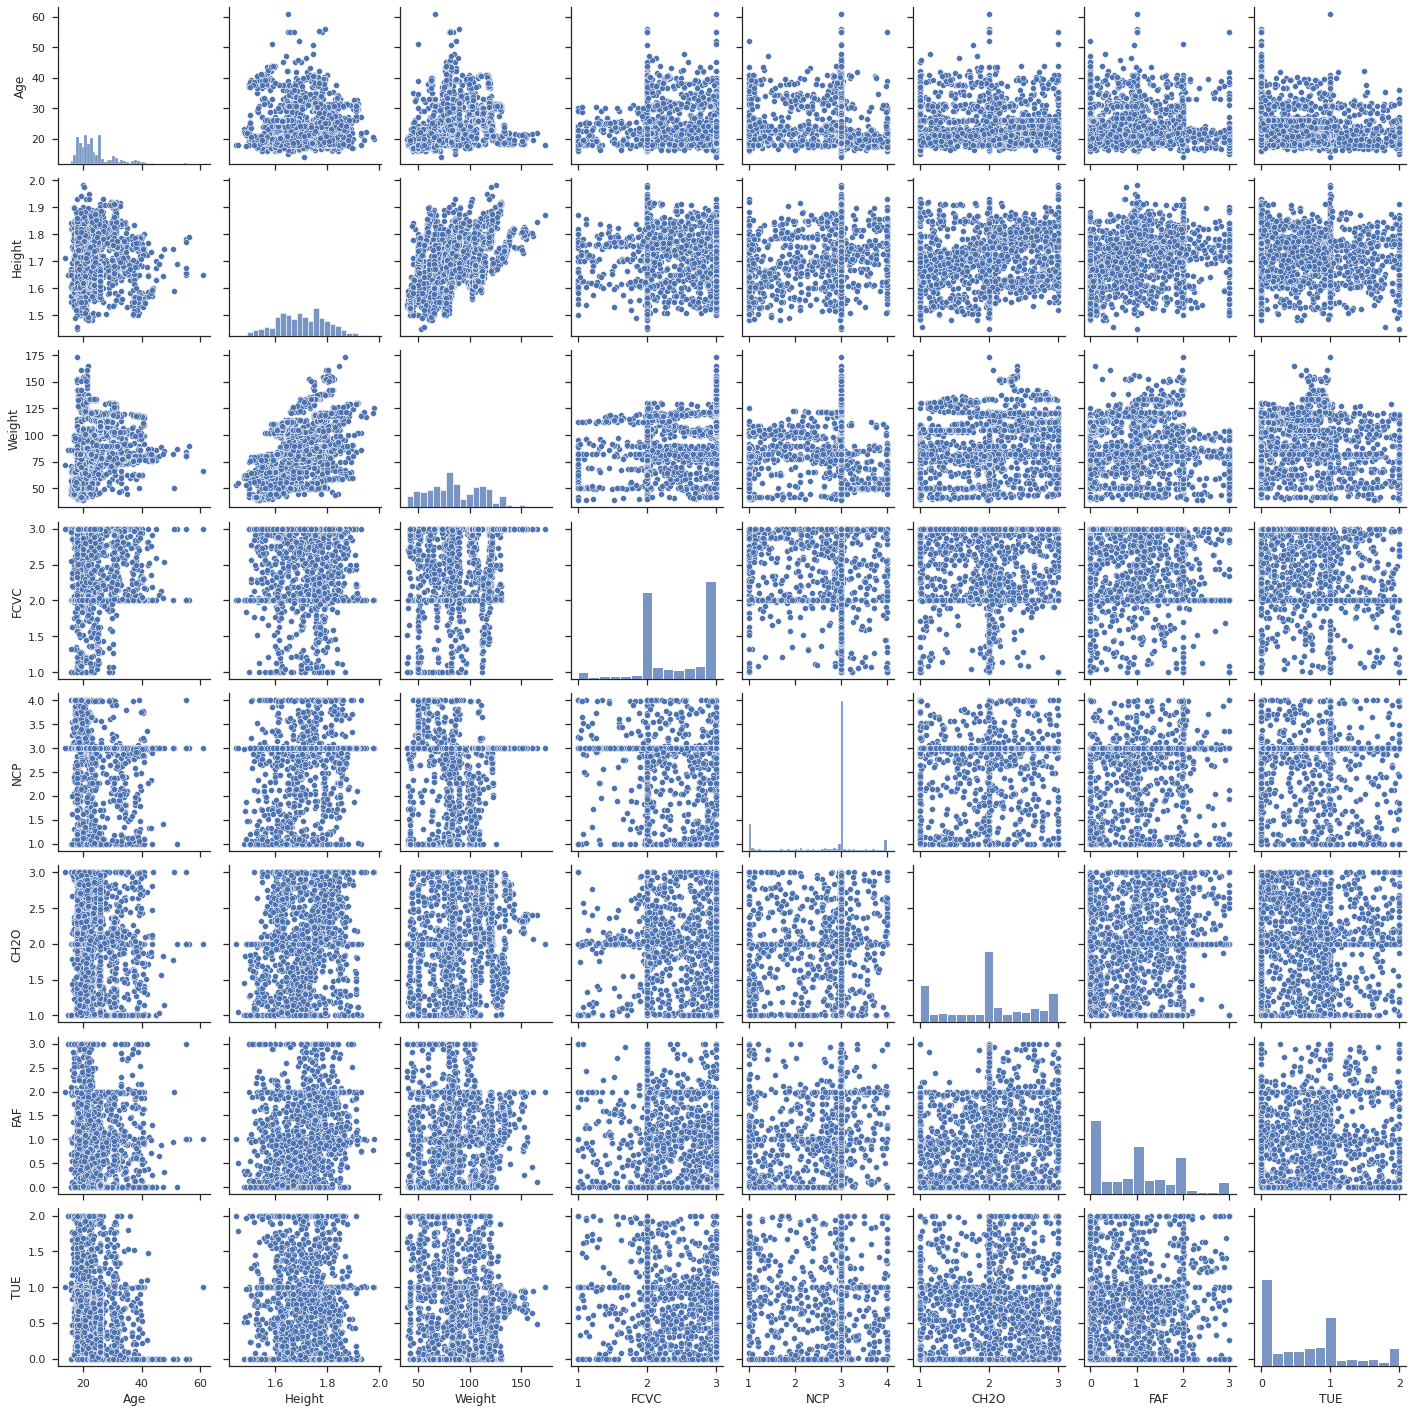

In [37]:
sns.set(style="ticks", color_codes=True)

g = sns.pairplot(dataset)
plt.show()

In [41]:
dataset.isnull().values.any()

False

In [42]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [43]:
dataset['NObeyesdad'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

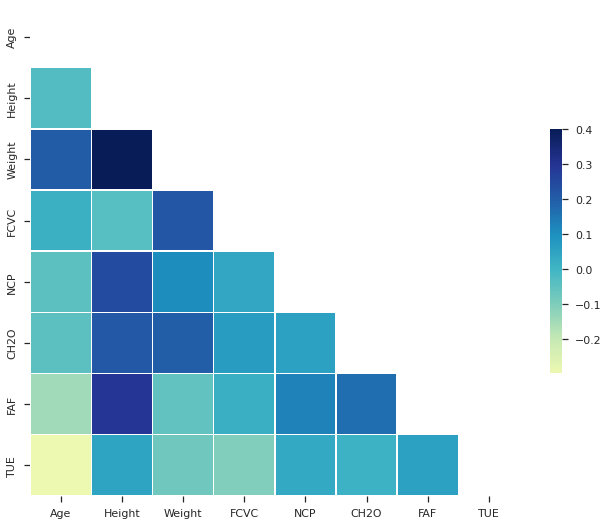

In [44]:
corr = dataset.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap='YlGnBu', vmax=.4, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [45]:
dataset.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [46]:
# Convert Gender,family_history_with_overweight,FAVC,SMOKE and SCC into 0's and 1's
dataset['Gender']=dataset['Gender'].apply(lambda x : 1 if x=='Male' else 0)
dataset["family_history_with_overweight"] = dataset["family_history_with_overweight"].apply(lambda x: 1 if x=="yes" else 0)
dataset["FAVC"] = dataset["FAVC"].apply(lambda x: 1 if x=="yes" else 0)
dataset["SMOKE"] = dataset["SMOKE"].apply(lambda x: 1 if x=="yes" else 0)
dataset["SCC"] = dataset["SCC"].apply(lambda x: 1 if x=="yes" else 0)

# label encoding
lbl_encode=LabelEncoder()
dataset['NObeyesdad']=lbl_encode.fit_transform(dataset['NObeyesdad'])

# One Hot encoding CAEC,CALC,MTRANS
data_dummies = dataset[['CAEC','CALC','MTRANS']]
data_dummies=pd.get_dummies(data_dummies)
dataset.drop(columns=['CAEC','CALC','MTRANS'],inplace=True)
data_NObeyesdad=dataset['NObeyesdad']
dataset.drop(columns=['NObeyesdad'],inplace=True)
dataset=dataset.merge(data_dummies,left_index=True, right_index=True,how='left')
dataset

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,CAEC_no,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,0,2.000000,...,0,0,0,0,1,0,0,0,1,0
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,3.000000,...,0,0,0,1,0,0,0,0,1,0
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,0,2.000000,...,0,0,1,0,0,0,0,0,1,0
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,0,2.000000,...,0,0,1,0,0,0,0,0,0,1
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,0,2.000000,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,0,1.728139,...,0,0,0,1,0,0,0,0,1,0
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,0,2.005130,...,0,0,0,1,0,0,0,0,1,0
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,0,2.054193,...,0,0,0,1,0,0,0,0,1,0
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,0,2.852339,...,0,0,0,1,0,0,0,0,1,0


In [47]:
data_NObeyesdad.head(10)

0    1
1    1
2    1
3    5
4    6
5    1
6    1
7    1
8    1
9    1
Name: NObeyesdad, dtype: int64

In [48]:
X = dataset.values
y = data_NObeyesdad.values

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)

X_train dataset:  (1688, 26)
y_train dataset:  (1688,)
X_test dataset:  (423, 26)
y_test dataset:  (423,)


In [50]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
models = []
models.append(['Logistic Regression',LogisticRegression(random_state=0)])
models.append(['SVM',SVC(random_state=0,probability=True)])
models.append(['KNeigbors',KNeighborsClassifier()])
models.append(['GaussianNB',GaussianNB()])
models.append(['BernoulliNB',BernoulliNB()])
models.append(['DecisionTree',DecisionTreeClassifier(random_state=0)])
models.append(['RandomForest',RandomForestClassifier(random_state=0)])
models.append(['XGBClassifier',XGBClassifier(random_state=0)])
models.append(['AdaBoostClassifier',AdaBoostClassifier()])
models.append(['GradientBoostingClassifier', GradientBoostingClassifier(random_state=0)])
models.append(['HistGradientBoostingClassifier', HistGradientBoostingClassifier(random_state=0)])
models.append(['LGBMClassifier', LGBMClassifier(n_estimators=200, random_state=0)])
models.append(['CatBoostClassifier', CatBoostClassifier(verbose=0, n_estimators=100)])

Logistic Regression :
[[61  4  0  0  0  0  0]
 [ 6 45  0  0  0  5  1]
 [ 0  0 60  2  3  0  2]
 [ 0  0  0 53  0  0  0]
 [ 0  0  0  0 69  0  0]
 [ 0  6  0  0  0 47  4]
 [ 0  0  3  2  1  5 44]]
Accuracy Score:  0.8959810874704491

K-Fold Validation Mean Accuracy: 86.43 %

ROC AUC Score: 0.99 %

Precision: 0.89 %

Recall: 0.85 %

F1 Score: 0.87 %

Cohen Score: 0.88 %
----------------------------------------

SVM :
[[59  6  0  0  0  0  0]
 [ 3 45  0  0  0  4  5]
 [ 0  3 57  3  0  0  4]
 [ 0  0  0 53  0  0  0]
 [ 0  0  0  0 69  0  0]
 [ 0  7  1  0  0 45  4]
 [ 0  9  4  0  0  5 37]]
Accuracy Score:  0.8628841607565012

K-Fold Validation Mean Accuracy: 84.54 %

ROC AUC Score: 0.98 %

Precision: 0.77 %

Recall: 0.82 %

F1 Score: 0.80 %

Cohen Score: 0.84 %
----------------------------------------

KNeigbors :
[[60  3  0  0  0  1  1]
 [ 9 32  3  2  0  4  7]
 [ 2  2 52  2  2  0  7]
 [ 0  0  0 53  0  0  0]
 [ 0  0  0  0 69  0  0]
 [ 0  6  7  1  0 42  1]
 [ 1  6  7  3  0  2 36]]
Accuracy Score:  0.

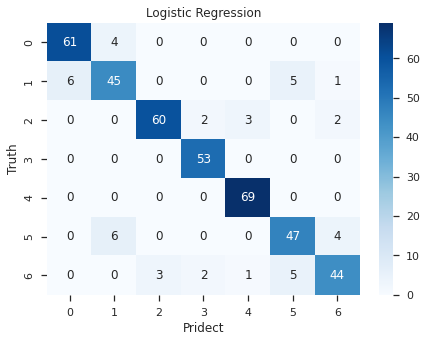

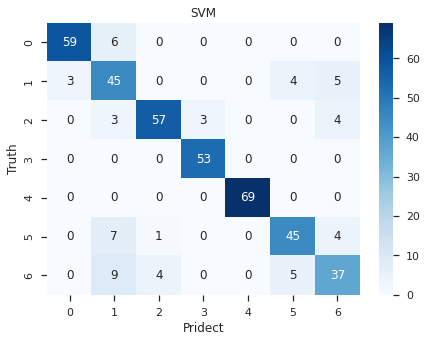

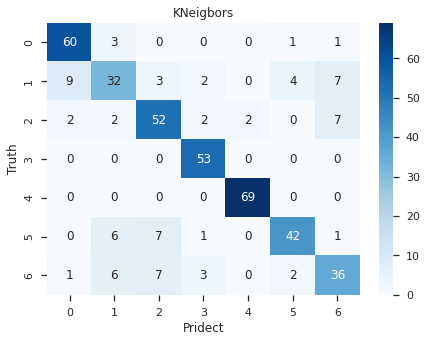

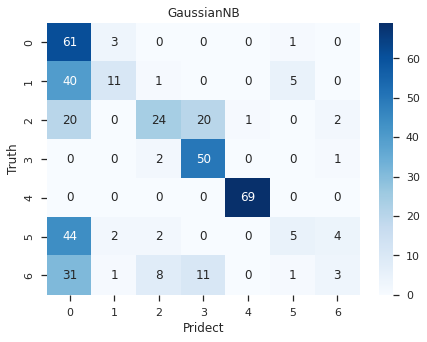

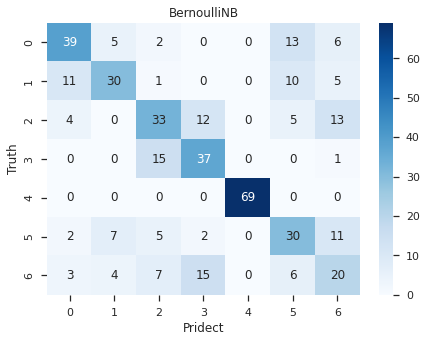

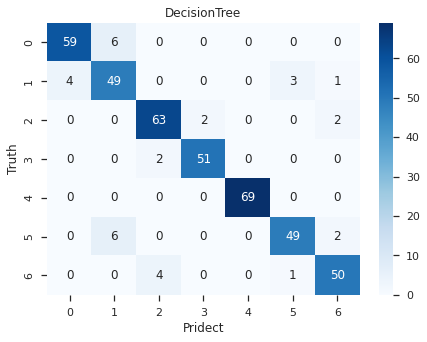

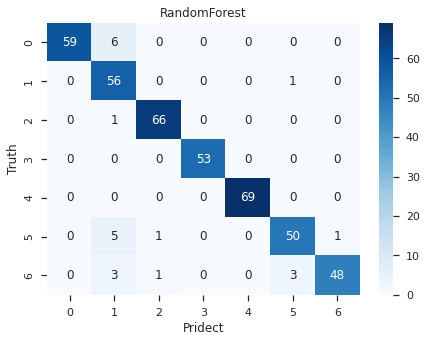

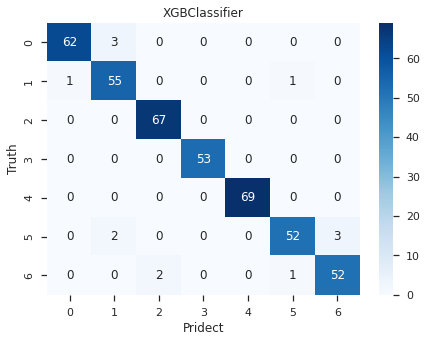

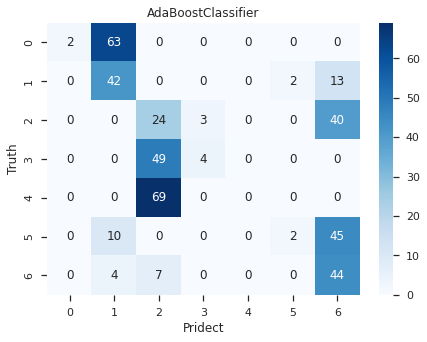

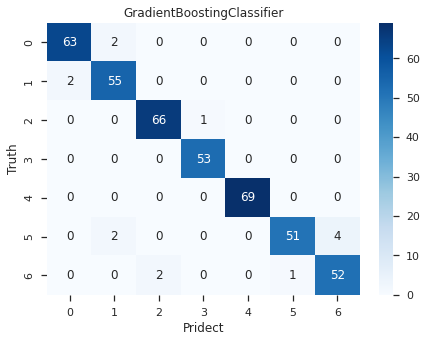

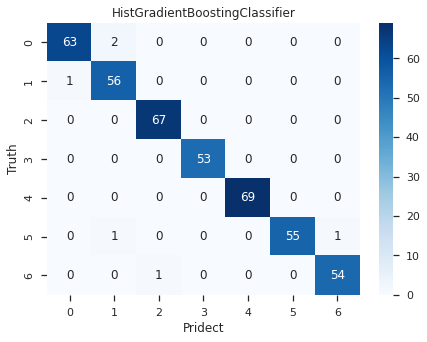

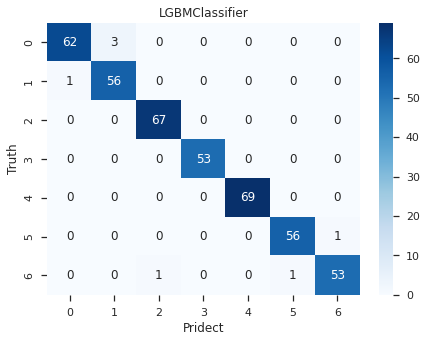

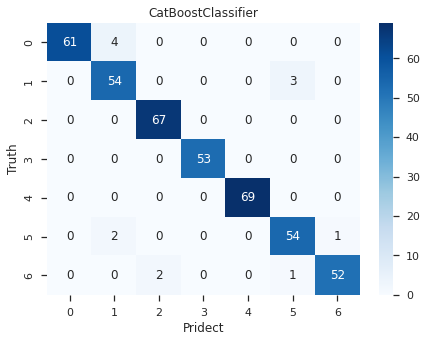

In [52]:
lst_1 = []
for m in range(len(models)):
    lst_2 = []
    model = models[m][1]
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_pred_roc=model.predict_proba(X_test_scaled)
    cm = confusion_matrix(y_test,y_pred)
    accuracies = cross_val_score(estimator= model, X = X_train_scaled,y = y_train, cv=10)


    roc=roc_auc_score(y_test,y_pred_roc,multi_class="ovo",average='macro',  sample_weight=None,  max_fpr=None )
    precision = precision_score(y_test,y_pred,labels=[1,2], average='micro')
    recall = recall_score(y_test,y_pred,labels=[1,2], average='micro')
    f1 = f1_score(y_test,y_pred,labels=[1,2], average='micro')
    cohen_score = cohen_kappa_score(y_test, y_pred)
    print(models[m][0],':')
    print(cm)
    plt.figure(figsize=(7,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(models[m][0])
    plt.xlabel('Pridect')
    plt.ylabel('Truth')
    print('Accuracy Score: ',accuracy_score(y_test,y_pred))
    print('')
    print('K-Fold Validation Mean Accuracy: {:.2f} %'.format(accuracies.mean()*100))
    print('')
    # print('Standard Deviation: {:.2f} %'.format(accuracies.std()*100))
    # print('')
    print('ROC AUC Score: {:.2f} %'.format(roc))
    print('')
    print('Precision: {:.2f} %'.format(precision))
    print('')
    print('Recall: {:.2f} %'.format(recall))
    print('')
    print('F1 Score: {:.2f} %'.format(f1))
    print('')
    print('Cohen Score: {:.2f} %'.format(cohen_score))
    print('-'*40)
    print('')
    lst_2.append(models[m][0])
    lst_2.append(accuracy_score(y_test,y_pred)*100)
    lst_2.append(accuracies.mean()*100)
    # lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_2.append(cohen_score)
    lst_1.append(lst_2)

In [53]:
df2 = pd.DataFrame(lst_1,columns=['Model','Accuracy','K-Fold Mean Accuracy','RoC-AuC','Precision','Recall','F1 Score', 'Cohen-Kappa Score'])

df2.sort_values(by=['Accuracy','K-Fold Mean Accuracy'],inplace=True,ascending=False)
df2

,Model,Accuracy,K-Fold Mean Accuracy,RoC-AuC,Precision,Recall,F1 Score,Cohen-Kappa Score
10,HistGradientBoostingClassifier,98.581560,97.334813,0.999789,0.968504,0.991935,0.980080,0.983425
11,LGBMClassifier,98.345154,97.157298,0.999625,0.968504,0.991935,0.980080,0.980663
12,CatBoostClassifier,96.926714,95.972809,0.999349,0.937984,0.975806,0.956522,0.964089
7,XGBClassifier,96.926714,95.321922,0.998504,0.945736,0.983871,0.964427,0.964087
9,GradientBoostingClassifier,96.690307,96.031981,0.998954,0.952756,0.975806,0.964143,0.961324
6,RandomForest,94.799054,94.847844,0.997583,0.877698,0.983871,0.927757,0.939235
5,DecisionTree,92.198582,92.242181,0.953220,0.861538,0.903226,0.881890,0.908835
0,Logistic Regression,89.598109,86.432094,0.987914,0.889831,0.846774,0.867769,0.878437
1,SVM,86.288416,84.538602,0.983575,0.772727,0.822581,0.796875,0.839854
2,KNeigbors,81.323877,79.089532,0.941866,0.711864,0.677419,0.694215,0.781657


Text(0.5, 1.0, 'Model Compare Graphic')

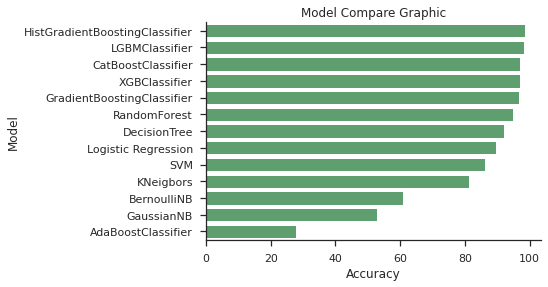

In [54]:
sns.barplot(x='Accuracy',y='Model',data=df2,color='g')
plt.title('Model Compare Graphic')

In [55]:
grid_models = [(HistGradientBoostingClassifier(),[{'loss':['auto'], 'learning_rate':[0.1], 'max_iter':[100], 'max_leaf_nodes':[31], 'max_depth':[None], 'min_samples_leaf':[20], 'l2_regularization':[0.0], 'max_bins':[255], 'categorical_features':[None], 'monotonic_cst':[None], 'warm_start':[False], 'early_stopping':['auto'], 'scoring':['loss'], 'validation_fraction':[0.1], 'n_iter_no_change':[10], 'tol':[1e-07], 'verbose':[0], 'random_state':[None]}]), 
               (LGBMClassifier(),[{'boosting_type':['gbdt'], 'num_leaves':[31], 'max_depth': [1], 'learning_rate':[0.1], 'n_estimators':[100], 'subsample_for_bin':[200000], 'objective':[None], 'class_weight':[None], 'min_split_gain':[0.0], 'min_child_weight':[0.001], 'min_child_samples':[20], 'subsample':[1.0], 'subsample_freq':[0], 'colsample_bytree':[1.0], 'reg_alpha':[0.0], 'reg_lambda':[0.0], 'random_state':[None], 'n_jobs':[ 1], 'importance_type':['split']}]), 
               (XGBClassifier(), [{'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error']}]),
               (CatBoostClassifier(), [{'max_depth': [3,4,5],'n_estimators':[100, 200, 300]}]),
               (GradientBoostingClassifier(),[{'learning_rate':[0.1],'n_estimators':[100],'subsample':[1.0],'criterion':['friedman_mse'], 'min_samples_split':[2], 'min_samples_leaf':[1], 'min_weight_fraction_leaf':[0.0], 'max_depth':[3], 'min_impurity_decrease':[0.0], 'init':[None], 'random_state':[None], 'max_features':[None], 'verbose':[0], 'max_leaf_nodes':[None], 'warm_start':[False], 'validation_fraction':[0.1], 'n_iter_no_change':[None], 'tol':[0.0001], 'ccp_alpha':[0.0]}]),
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}]),
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]),
                (SVC(), [{'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf']}])]
               

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = 10)
    grid.fit(X_train_scaled, y_train)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print(' {}: \n Best Accuracy: {:.2f} %'.format(i,best_accuracy*100))
    print(' Best Parameters is', best_param)
    print('')
    print('-'*25)
    print('')

Streaming output truncated to the last 5000 lines.
49:	learn: 0.1295275	total: 343ms	remaining: 1.03s
50:	learn: 0.1266924	total: 350ms	remaining: 1.02s
51:	learn: 0.1240747	total: 365ms	remaining: 1.04s
52:	learn: 0.1225193	total: 372ms	remaining: 1.03s
53:	learn: 0.1199971	total: 379ms	remaining: 1.02s
54:	learn: 0.1190627	total: 385ms	remaining: 1.01s
55:	learn: 0.1156004	total: 392ms	remaining: 1.01s
56:	learn: 0.1132806	total: 399ms	remaining: 1000ms
57:	learn: 0.1127757	total: 405ms	remaining: 990ms
58:	learn: 0.1114701	total: 411ms	remaining: 982ms
59:	learn: 0.1086484	total: 417ms	remaining: 974ms
60:	learn: 0.1048956	total: 424ms	remaining: 966ms
61:	learn: 0.1035031	total: 430ms	remaining: 957ms
62:	learn: 0.1003483	total: 436ms	remaining: 949ms
63:	learn: 0.0992068	total: 443ms	remaining: 940ms
64:	learn: 0.0969440	total: 449ms	remaining: 933ms
65:	learn: 0.0959407	total: 455ms	remaining: 924ms
66:	learn: 0.0949260	total: 462ms	remaining: 916ms
67:	learn: 0.0930929	total: 46

In [58]:
tuned_models = []

tuned_models.append(['HistGradientBoostingClassifier',HistGradientBoostingClassifier(learning_rate=0.1 , random_state=0)])
tuned_models.append(['LGBMClassifier',LGBMClassifier(learning_rate=0.1,n_estimators=200 , random_state=None)])
tuned_models.append(['XGBClassifier',XGBClassifier(random_state=0, eval_metric= 'error', learning_rate= 0.1)])
tuned_models.append(['GradientBoostingClassifier',GradientBoostingClassifier(n_estimators=200, learning_rate=0.1 , random_state=0)])
tuned_models.append(['RandomForest',RandomForestClassifier(criterion= 'entropy', n_estimators= 200, random_state= 0)])
tuned_models.append(['DecisionTree',DecisionTreeClassifier(criterion= 'gini', random_state= 0)])
#tuned_models.append(['SVM',SVC(random_state=0, C= 1, gamma= 1, kernel= 'rbf')])
tuned_models.append(['CatBoostClassifier', CatBoostClassifier(verbose=0, n_estimators=100)])

HistGradientBoostingClassifier :
[[63  2  0  0  0  0  0]
 [ 1 56  0  0  0  0  0]
 [ 0  0 67  0  0  0  0]
 [ 0  0  0 53  0  0  0]
 [ 0  0  0  0 69  0  0]
 [ 0  1  0  0  0 55  1]
 [ 0  0  1  0  0  0 54]]
Accuracy Score:  0.9858156028368794

K-Fold Validation Mean Accuracy: 97.33 %

ROC AUC Score: 1.00 %

Precision: 0.97 %

Recall: 0.99 %

F1 Score: 0.98 %

Cohen Score: 0.98 %
----------------------------------------

LGBMClassifier :
[[62  3  0  0  0  0  0]
 [ 1 56  0  0  0  0  0]
 [ 0  0 67  0  0  0  0]
 [ 0  0  0 53  0  0  0]
 [ 0  0  0  0 69  0  0]
 [ 0  0  0  0  0 56  1]
 [ 0  0  1  0  0  1 53]]
Accuracy Score:  0.983451536643026

K-Fold Validation Mean Accuracy: 97.16 %

ROC AUC Score: 1.00 %

Precision: 0.97 %

Recall: 0.99 %

F1 Score: 0.98 %

Cohen Score: 0.98 %
----------------------------------------

XGBClassifier :
[[62  3  0  0  0  0  0]
 [ 1 55  0  0  0  1  0]
 [ 0  0 67  0  0  0  0]
 [ 0  0  0 53  0  0  0]
 [ 0  0  0  0 69  0  0]
 [ 0  2  0  0  0 52  3]
 [ 0  0  2  0  0  1

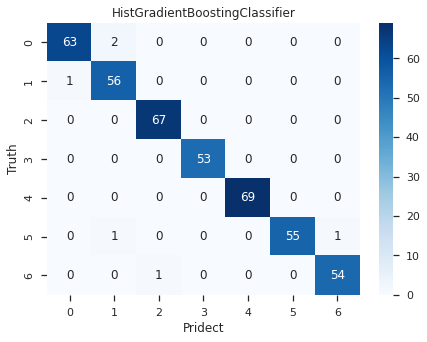

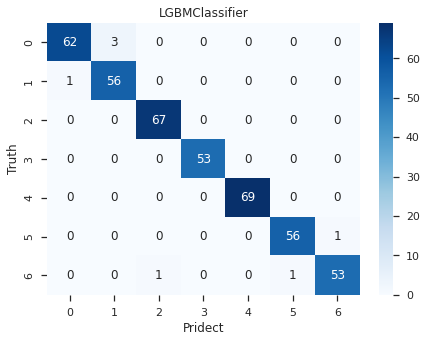

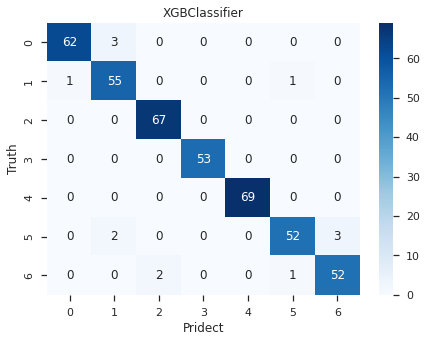

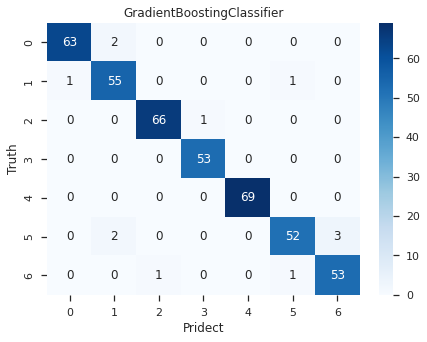

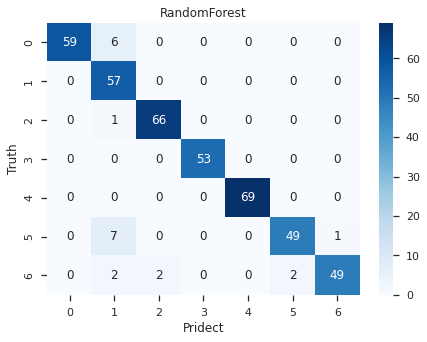

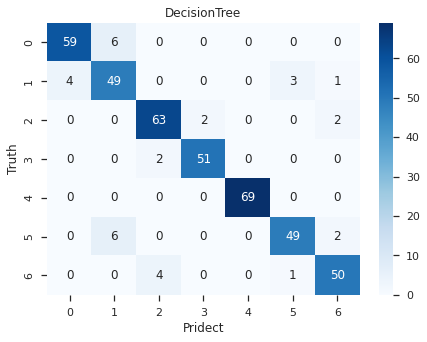

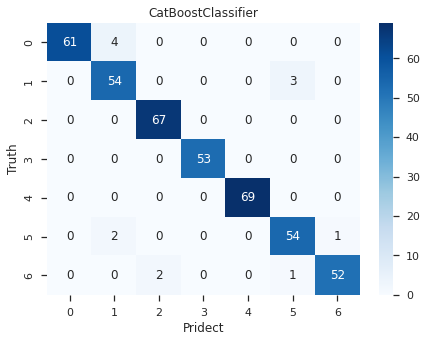

In [59]:
lst_3 = []
for m in range(len(tuned_models)):
    lst_4 = []
    model = tuned_models[m][1]
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_pred_roc=model.predict_proba(X_test_scaled)
    cm = confusion_matrix(y_test,y_pred)
    accuracies = cross_val_score(estimator= model, X = X_train_scaled,y = y_train, cv=10)


    roc=roc_auc_score(y_test,y_pred_roc,multi_class="ovo",average='macro',  sample_weight=None,  max_fpr=None )
    precision = precision_score(y_test,y_pred,labels=[1,2], average='micro')
    recall = recall_score(y_test,y_pred,labels=[1,2], average='micro')
    f1 = f1_score(y_test,y_pred,labels=[1,2], average='micro')
    cohen_score = cohen_kappa_score(y_test, y_pred)
    print(tuned_models[m][0],':')
    print(cm)
    plt.figure(figsize=(7,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(tuned_models[m][0])
    plt.xlabel('Pridect')
    plt.ylabel('Truth')
    print('Accuracy Score: ',accuracy_score(y_test,y_pred))
    print('')
    print('K-Fold Validation Mean Accuracy: {:.2f} %'.format(accuracies.mean()*100))
    print('')
    # print('Standard Deviation: {:.2f} %'.format(accuracies.std()*100))
    # print('')
    print('ROC AUC Score: {:.2f} %'.format(roc))
    print('')
    print('Precision: {:.2f} %'.format(precision))
    print('')
    print('Recall: {:.2f} %'.format(recall))
    print('')
    print('F1 Score: {:.2f} %'.format(f1))
    print('')
    print('Cohen Score: {:.2f} %'.format(cohen_score))
    print('-'*40)
    print('')
    lst_4.append(tuned_models[m][0])
    lst_4.append(accuracy_score(y_test,y_pred)*100)
    lst_4.append(accuracies.mean()*100)
    # lst_4.append(accuracies.std()*100)
    lst_4.append(roc)
    lst_4.append(precision)
    lst_4.append(recall)
    lst_4.append(f1)
    lst_4.append(cohen_score)
    lst_3.append(lst_4)

In [60]:
df3 = pd.DataFrame(lst_3,columns=['Model','Accuracy','K-Fold Mean Accuracy','Roc-AuC','Precision','Recall','F1 Score', 'Cohen-Kappa Score'])

df3.sort_values(by=['Accuracy','K-Fold Mean Accuracy'],inplace=True,ascending=False)
df3

,Model,Accuracy,K-Fold Mean Accuracy,Roc-AuC,Precision,Recall,F1 Score,Cohen-Kappa Score
0,HistGradientBoostingClassifier,98.581560,97.334813,0.999789,0.968504,0.991935,0.980080,0.983425
1,LGBMClassifier,98.345154,97.157298,0.999625,0.968504,0.991935,0.980080,0.980663
3,GradientBoostingClassifier,97.163121,96.447239,0.999191,0.960317,0.975806,0.968000,0.966853
6,CatBoostClassifier,96.926714,95.972809,0.999349,0.937984,0.975806,0.956522,0.964089
2,XGBClassifier,96.926714,95.321922,0.998504,0.945736,0.983871,0.964427,0.964087
4,RandomForest,95.035461,94.789025,0.997953,0.872340,0.991935,0.928302,0.941998
5,DecisionTree,92.198582,92.242181,0.953220,0.861538,0.903226,0.881890,0.908835


Text(0.5, 1.0, 'Model Compare Graphic')

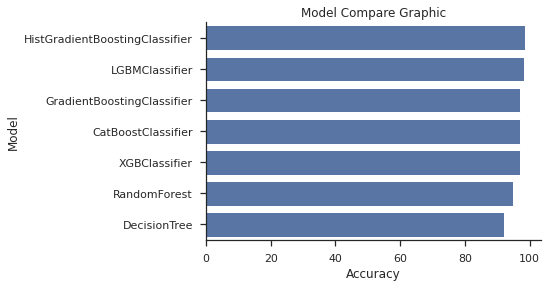

In [61]:
sns.barplot(x='Accuracy',y='Model',data=df3,color='b')
plt.title('Model Compare Graphic')

In [62]:
def plot_ROC_curve(model, X_train_scaled, y_train, X_test_scaled, y_test):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model)
                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(X_train_scaled, y_train)
    visualizer.score(X_test_scaled, y_test)
    visualizer.show()
    
    return visualizer

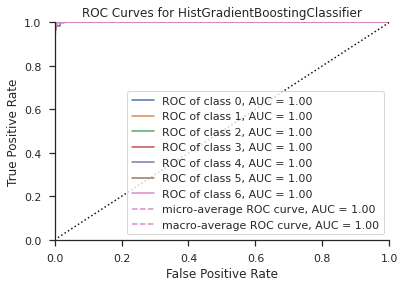

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f871f4a1950>,
       estimator=HistGradientBoostingClassifier(random_state=0))

In [63]:
plot_ROC_curve(HistGradientBoostingClassifier(learning_rate=0.1 , random_state=0),X_train_scaled, y_train, X_test_scaled, y_test)
